# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

### 1. EDA (exploratory data analysis) (1 punt)

**Preguntes:**


In [408]:
import numpy as np
import pandas as pd
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

* ¿Cuántos atributos tiene su base de datos?

In [409]:
num_attributes = train_data.shape[1]
attribute_names = train_data.columns.tolist()
print("Número de atributos:", num_attributes)
print("Atributos:", attribute_names)

Número de atributos: 12
Atributos: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* ¿Qué tipo de atributos tienes? (Numéricos, temporales, categóricos, binarios...)

In [410]:
#Esto dará información sobre si los atributos son numéricos (int o float), categóricos (object), temporales (datetime), binarios (boolean), etc.
attribute_types = train_data.dtypes
print("Tipos de atributos:")
print(attribute_types)

Tipos de atributos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Basándonos en la información, podemos categorizar los atributos de la siguiente manera:

* Atributos Numéricos:
  * PassengerId: Entero (int64) - Identificador único para cada pasajero.
  * Survived: Entero (int64) - Este es el atributo objetivo que representa si un pasajero sobrevivió o no.
  * Pclass: Entero (int64) - Clase del pasajero (1, 2 o 3).
  * Age: Decimal de punto flotante (float64) - Edad del pasajero.
  * SibSp: Entero (int64) - Número de hermanos o cónyuges a bordo.
  * Parch: Entero (int64) - Número de padres o hijos a bordo.
  * Fare: Decimal de punto flotante (float64) - Tarifa pagada por el pasajero.
* Atributos Categóricos:
  * Name: Objeto (object) - Nombre del pasajero (texto).
  * Sex: Objeto (object) - Género del pasajero (por ejemplo, "male" o "female").
  * Ticket: Objeto (object) - Número de boleto del pasajero (texto).
  * Cabin: Objeto (object) - Número de cabina del pasajero (texto).
  * Embarked: Objeto (object) - Puerto de embarque del pasajero (por ejemplo, "C", "Q" o "S").

* Como es el target, ¿cuántas categorías diferentes existen?

In [411]:
target_categories = train_data["Survived"].nunique()
print("Número de categorías en el target:", target_categories)

Número de categorías en el target: 2


El hecho de que haya 2 categorías en el atributo objetivo ("Survived") significa que es un problema de clasificación binaria.  
  
En este caso, las dos categorías representan:

* Sobrevivió (Survived): Esta categoría generalmente se representa como "1" o "Sí" y denota que el pasajero sobrevivió al hundimiento del Titanic.

* No Sobrevivió (Not Survived): Esta categoría generalmente se representa como "0" o "No" y denota que el pasajero no sobrevivió al hundimiento del Titanic.

Dado que es un problema de clasificación binaria, nuestro objetivo será construir un modelo predictivo que pueda predecir si un pasajero sobrevivió (1) o no sobrevivió (0) en función de las características disponibles en los datos.

* ¿Tenemos nulos en los datos?

In [412]:
null_counts = train_data.isnull().sum()
print("Número de valores nulos por atributo:")
print(null_counts)

Número de valores nulos por atributo:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Algunas observaciones sobre el número de valores nulos (NaN):

* Age (Edad): Hay 177 valores nulos en la columna "Age". Esto significa que falta información sobre la edad de 177 pasajeros en los datos. Podemos considerar estrategias para imputar estos valores faltantes, como reemplazarlos con la mediana o la media de la edad.

* Cabin (Cabina): Hay 687 valores nulos en la columna "Cabin". Esto indica que la información sobre la cabina está ausente para la mayoría de los pasajeros. Podemos decidir si utilizar esta columna en el modelo, o descartarla debido a la gran cantidad de valores faltantes.

* Embarked (Puerto de Embarque): Hay 2 valores nulos en la columna "Embarked". Esto significa que falta información sobre el puerto de embarque para 2 pasajeros. Podemos decidir si imputar estos valores o eliminar las filas correspondientes si no afectan significativamente al análisis.

Antes de realizar análisis o modelado, es importante tratar los valores nulos de manera adecuada para garantizar que no afecten negativamente los resultados. Las estrategias de imputación o eliminación de valores nulos dependerán de la naturaleza de los datos y los objetivos del análisis.

* ¿Puede ver alguna correlación entre X y y?

In [413]:
# Calcular la matriz de correlación
correlation_matrix = train_data.corr()

# Ordenar la correlación con respecto a "Survived"
correlation_with_target = correlation_matrix["Survived"].sort_values(ascending=False)

# Mostrar la correlación con "Survived"
print("Correlación con Survived:")
print(correlation_with_target)

Correlación con Survived:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


C:\Users\adria\AppData\Local\Temp\ipykernel_27752\1629917562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


Algunas observaciones sobre la correlación:

* Survived vs. Fare (Tarifa): La correlación positiva de 0.2573 indica que las personas que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir. Esto podría sugerir que la clase socioeconómica o el nivel de comodidad del pasajero influyeron en sus posibilidades de sobrevivir.

* Survived vs. Parch (Número de Hijos a Bordo): La correlación positiva de 0.0816 sugiere que las personas que viajaban con más hijos tenían una mayor probabilidad de sobrevivir, aunque la correlación no es muy fuerte.

* Survived vs. Age (Edad): La correlación negativa de -0.0772 indica que las personas más jóvenes tenían una ligera tendencia a tener una mayor probabilidad de sobrevivir. Sin embargo, la correlación no es muy fuerte, por lo que la edad por sí sola no es un predictor fuerte de la supervivencia.

* Survived vs. Pclass (Clase del Pasajero): La correlación negativa más fuerte de -0.3385 sugiere que la clase del pasajero influyó significativamente en sus posibilidades de supervivencia. Esto es coherente con la intuición de que las personas en clases socioeconómicas más altas tenían más probabilidades de sobrevivir.

* Survived vs. SibSp (Número de Hermanos/Cónyuges a Bordo): La correlación negativa de -0.0353 indica que las personas que viajaban con más hermanos o cónyuges tenían una ligeramente menor probabilidad de sobrevivir, aunque la correlación es débil.

* Survived vs. PassengerId: La correlación cercana a cero (-0.0050) entre "Survived" y "PassengerId" sugiere que el identificador de pasajero no tiene una influencia significativa en la probabilidad de supervivencia.

Es importante recordar que la correlación no implica causalidad, por lo que no podemos afirmar que una variable causa directamente la supervivencia. Sin embargo, estas correlaciones proporcionan información valiosa para la exploración inicial de datos y pueden ser útiles al seleccionar características para modelos de aprendizaje automático o al comprender mejor las dinámicas en el conjunto de datos del Titanic.

* ¿Están balanceadas las etiquetas (distribución similar entre categorías)? ¿Crees que puede afectar a la clasificación su distribución?

In [414]:
# Conteo de valores únicos en la columna "Survived" (atributo del target)
survival_counts = train_data["Survived"].value_counts()

# Mostrar el conteo de etiquetas
print("Conteo de etiquetas:")
print(survival_counts)

Conteo de etiquetas:
0    549
1    342
Name: Survived, dtype: int64


En este caso, las etiquetas no están completamente balanceadas, ya que hay una diferencia significativa en el número de muestras entre las dos clases.

La distribución desequilibrada puede afectar significativamente la clasificación en un problema de aprendizaje automático, algunas formas en las que puede influir:

* Sesgo en la Predicción: Los modelos de clasificación tienden a tener un sesgo hacia la clase mayoritaria cuando las etiquetas están desequilibradas. Esto significa que el modelo puede predecir con mayor frecuencia la clase mayoritaria, lo que resulta en una baja tasa de detección de la clase minoritaria (falsos negativos).

* Pérdida de Información: Cuando una clase está subrepresentada en los datos, el modelo puede tener menos información para aprender sobre esa clase, lo que podría resultar en una capacidad de predicción deficiente para esa clase.

* Métricas Engañosas: Las métricas de evaluación, como la precisión, pueden ser engañosas en conjuntos de datos desequilibrados. Un modelo que predice siempre la clase mayoritaria podría tener una alta precisión, pero no sería útil en la práctica.

* Costos Asociados: En aplicaciones del mundo real, las decisiones basadas en modelos de clasificación pueden tener costos asociados. Por ejemplo, en la detección de enfermedades raras, predecir incorrectamente la clase minoritaria puede tener consecuencias graves.

**Información General:**

Análisis del tamaño y la tipología de los datos:

In [415]:
# Tamaño de los datos de entrenamiento y prueba
print("Tamaño de los datos de entrenamiento:", train_data.shape)
print("Tamaño de los datos de prueba:", test_data.shape)


Tamaño de los datos de entrenamiento: (891, 12)
Tamaño de los datos de prueba: (418, 11)


In [416]:
# Información sobre las columnas y tipos de datos
print("\nInformación de los datos de entrenamiento:")
print(train_data.info())


Información de los datos de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [417]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(train_data.describe())


Resumen estadístico de las columnas numéricas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Valoración de correlación:

C:\Users\adria\AppData\Local\Temp\ipykernel_27752\631925138.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


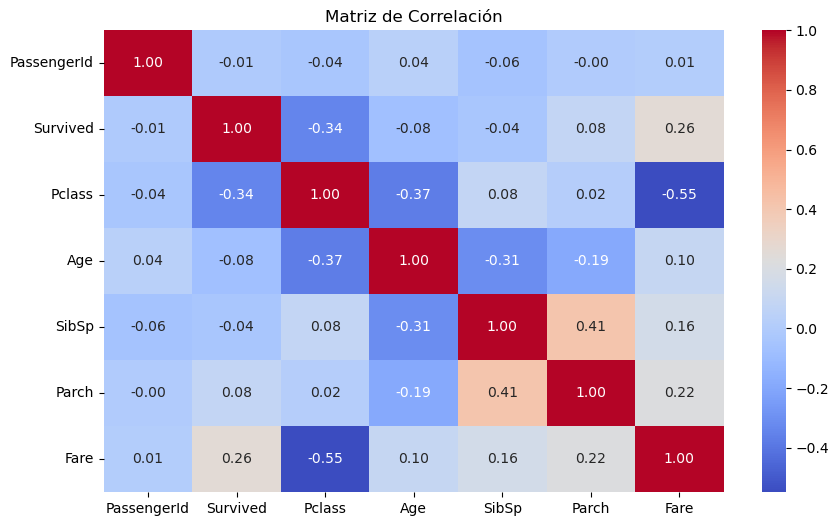

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
correlation_matrix = train_data.corr()

# Visualización de la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Análisis de los atributos del target:

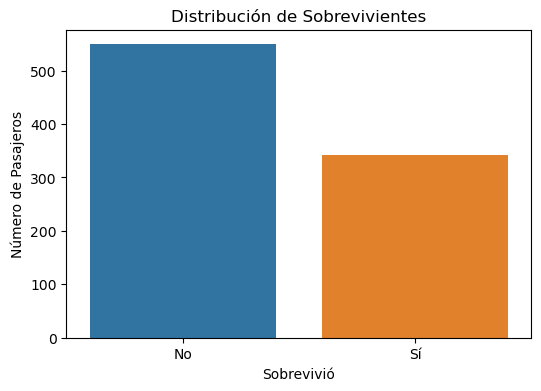

Porcentaje de pasajeros que sobrevivieron:
0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [419]:
# Conteo de valores únicos en la columna "Survived" (atributo del target)
survival_counts = train_data["Survived"].value_counts()

# Gráfico de barras para visualizar la distribución de sobrevivientes
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=train_data)
plt.xlabel("Sobrevivió")
plt.ylabel("Número de Pasajeros")
plt.title("Distribución de Sobrevivientes")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

# Porcentaje de pasajeros que sobrevivieron
survival_percentage = survival_counts / len(train_data) * 100
print("Porcentaje de pasajeros que sobrevivieron:")
print(survival_percentage)


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

* Están les dades normalitzades? Caldria fer-ho?

In [420]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como se puede ver en la tabla anterior a partir de la media de cada atributo, los datos no están normalizados. Siempre es buena praxis normalizar los datos, porque nunca empeoran los resultados obtenidos, y en este caso es necesario si queremos llegar a aplicar modelos más allá de una regresión logística.

* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?

Columna: PassengerId
--------------------------------------
Shapiro-Wilk p-value: 6.309874531781976e-16
La columna no sigue una distribución normal (se rechaza H0)


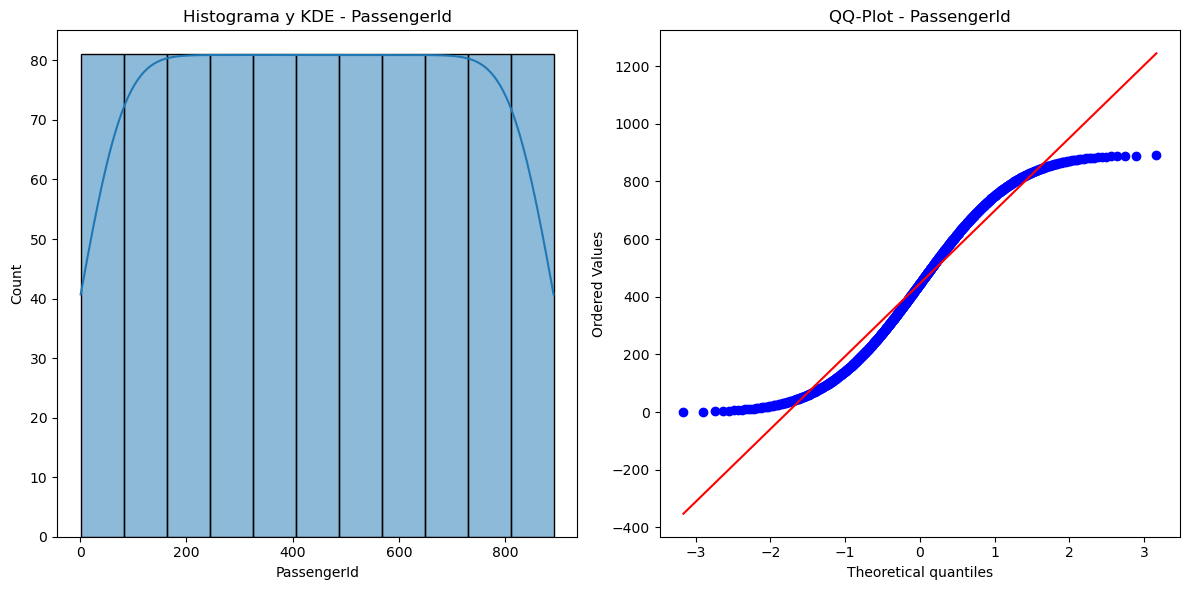

Columna: Age
--------------------------------------
Shapiro-Wilk p-value: 7.340329943872348e-08
La columna no sigue una distribución normal (se rechaza H0)


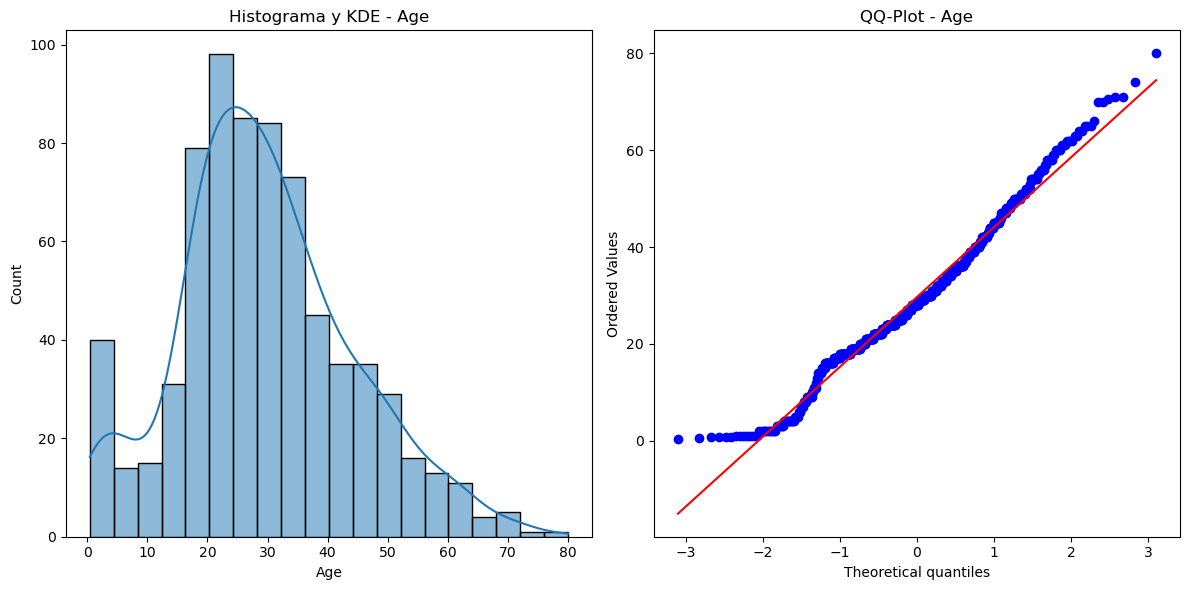

Columna: SibSp
--------------------------------------
Shapiro-Wilk p-value: 5.74532370373175e-44
La columna no sigue una distribución normal (se rechaza H0)


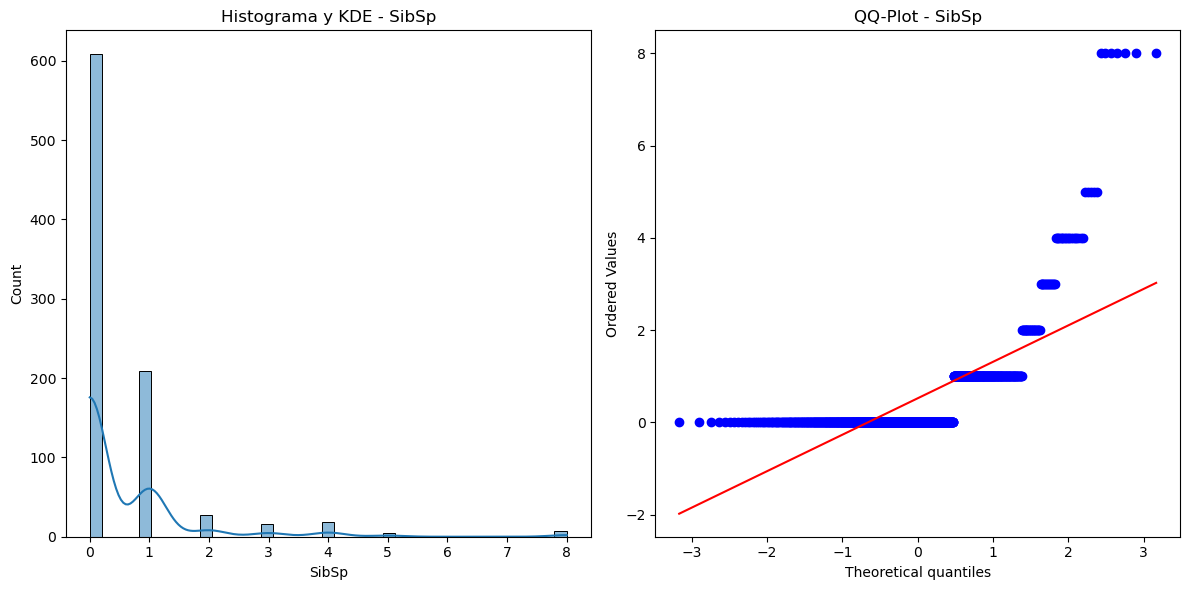

Columna: Parch
--------------------------------------
Shapiro-Wilk p-value: 2.382207389352189e-43
La columna no sigue una distribución normal (se rechaza H0)


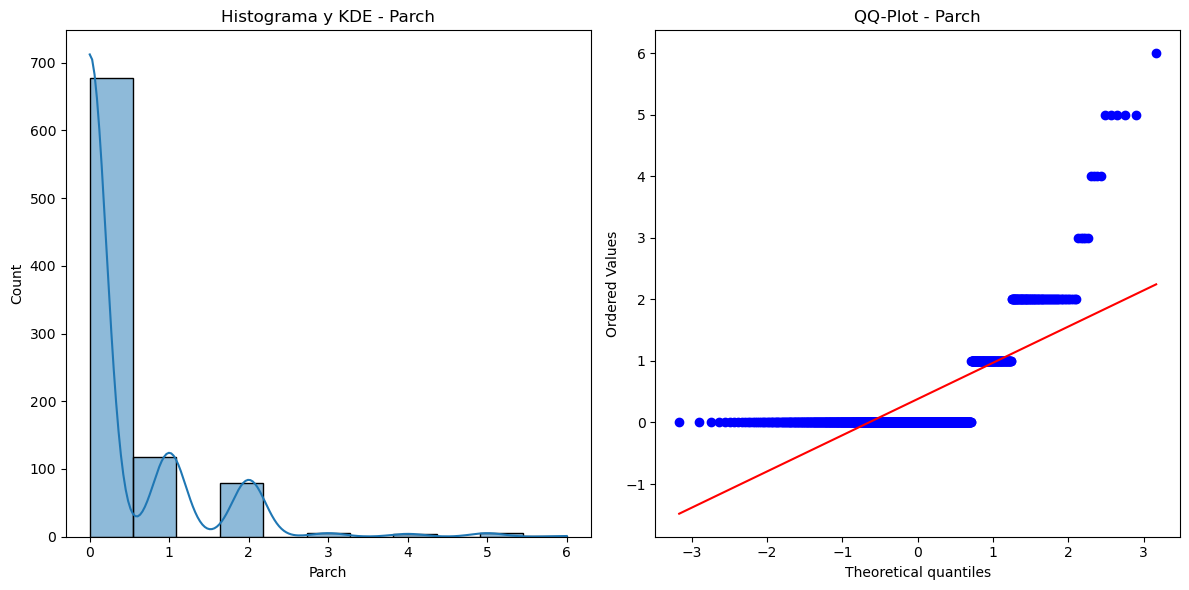

Columna: Fare
--------------------------------------
Shapiro-Wilk p-value: 1.0789998175301091e-43
La columna no sigue una distribución normal (se rechaza H0)


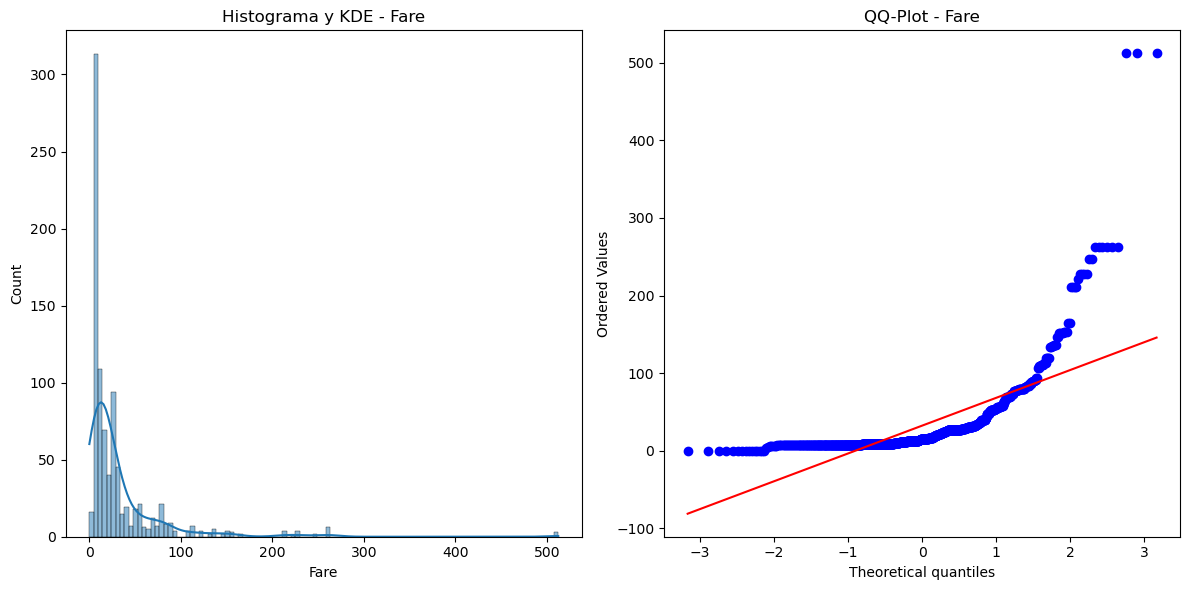

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pandas as pd
import numpy as np

# Selección de columnas numéricas
numeric_columns = ['PassengerId','Age', 'SibSp', 'Parch', 'Fare']

# Comprobación de normalidad para cada columna
for column in numeric_columns:
    data = train_data[column].dropna()  # Elimina NaN si los hay

    # Prueba de Shapiro-Wilk
    stat, p_value = shapiro(data)
    alpha = 0.05

    print(f'Columna: {column}')
    print('--------------------------------------')
    print(f'Shapiro-Wilk p-value: {p_value}')

    if p_value > alpha:
        print('La columna parece seguir una distribución normal (no se puede rechazar H0)')
    else:
        print('La columna no sigue una distribución normal (se rechaza H0)')

    # Visualización de la distribución
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histograma y KDE - {column}')

    plt.subplot(1, 2, 2)
    probplot(data, dist='norm', plot=plt)
    plt.title(f'QQ-Plot - {column}')

    plt.tight_layout()
    plt.show()

Como las columnas numéricas no siguen una distribución normal, podríamos aplicar una normalización Min-Max.

In [422]:
from sklearn.preprocessing import MinMaxScaler

# Selección de columnas a normalizar
columns_to_normalize = ['PassengerId','Age', 'SibSp', 'Parch', 'Fare']

# Crea un MinMaxScaler
scaler = MinMaxScaler()

# Normaliza las columnas seleccionadas
normalized_train_data = train_data

normalized_train_data[columns_to_normalize] = scaler.fit_transform(train_data[columns_to_normalize])

# Verifica el resultado
print("Conjunto de datos normalizado:")
print(train_data.head())

Conjunto de datos normalizado:
   PassengerId  Survived  Pclass  \
0     0.000000         0       3   
1     0.001124         1       1   
2     0.002247         1       3   
3     0.003371         1       1   
4     0.004494         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229  0.125   
2                             Heikkinen, Miss. Laina  female  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531  0.125   
4                           Allen, Mr. William Henry    male  0.434531  0.000   

   Parch            Ticket      Fare Cabin Embarked  
0    0.0         A/5 21171  0.014151   NaN        S  
1    0.0          PC 17599  0.139136   C85        C  
2    0.0  STON/O2. 3101282  0.015469   NaN        S  
3    0.0            113803  0.103644  C123       

* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)

La columna 'Cabin' tiene nans en la mayor parte de las filas, por lo que sería mejor descartarla por la poca información que aporta. Luego también hay nans en la columna 'Age', pero estos se podrían tratar. Una forma de rellenar estos datos es basarnos en la clase a la que pertenece cada pasajero, ya que parece haber una relación entre la edad de la gente y la clase en la que viajaban.

In [423]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
columns = ['Age', 'Pclass']
train_data[columns] = imp.fit_transform(train_data[columns])
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,2.308642,0.362187,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.836071,0.166007,0.137843,0.134343,0.096995
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,2.000000,0.271174,0.000000,0.000000,0.015440
50%,0.500000,0.000000,3.000000,0.321438,0.000000,0.000000,0.028213
75%,0.750000,1.000000,3.000000,0.459663,0.125000,0.000000,0.060508
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* Teniu dades categoriques? Quina seria la cofificació amb més sentit?

In [424]:
train_data.dtypes

PassengerId    float64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Los datos categóricos que hay son: Name, Sex, Ticket, Cabin, Embarked.
Únicamente Sex y Embarked tienen un número limitado de categorías, por lo que son las únicas columnas que se podrían codificar numéricamente de la siguiente forma:
- Sex: 0 Male, 1 Female
- Embarked: 0 S, 1 C, 2 Q  
Cabin, como hemos dicho anteriormente sería mejor elminiarla, por lo que no hace falta tenerla en cuenta, y Name difícilmente tendría relevancia a la hora de sobrevivir en esa situación. Por tanto ambas se elminarían.

* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?

In [425]:

# Extraer filas únicas de la columna 'Ticket'
unique_tickets = train_data['Ticket'].unique()

# Verifica el resultado
print("Filas únicas de la columna 'Ticket':")
print(unique_tickets)

Filas únicas de la columna 'Ticket':
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' 

De la columna de Ticket, se podría extraer las letras del número de ticket o si tienen letras o no.

In [426]:
# Extraer la letra del boleto (si existe)
train_data['Ticket_Letter'] = train_data['Ticket'].apply(lambda x: x[0] if not x.split(' ')[0].isnumeric() else 'None')

# Identificar si el boleto contiene solo números o caracteres alfanuméricos
train_data['Ticket_IsNumeric'] = train_data['Ticket'].apply(lambda x: x.split(' ')[0].isnumeric())

# Verificar el resultado
print(train_data[['Ticket', 'Ticket_Letter', 'Ticket_IsNumeric']].head())

             Ticket Ticket_Letter  Ticket_IsNumeric
0         A/5 21171             A             False
1          PC 17599             P             False
2  STON/O2. 3101282             S             False
3            113803          None              True
4            373450          None              True


* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?

Para este conjunto de datos, no es necesario aplicar PCA, aunque sí que se podrían relacionar las columnas Fare y Class, ya que el precio depende de la clase a la que se unió cada pasajero. Esto conseguiría reducir la complejidad del problema por tener menos columnas y no tener que analizar una columna continua.

* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?

En este caso podría venir bien seleccionar algunas características y descartar otras. Como ya se ha dicho anteriormente, las características Name y Cabin se podrían eliminar. Además, para evitar posibles sesgos, se podría considerar elminiar la característica Sex, ya que en una situación real, aunque exista el protocolo de "Niños y mujeres primero", no es seguro que se aplique, y en caso de que el modelo indique que ser mujer implica una mayor probabilidad de sobrevivir, dejaría de ser correcto el resultado del modelo si se permitiesen pasar solo a mujeres en un barco que acabe hundiéndose.

Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models

# PREGUNTES

### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?

In [427]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('titanic/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic/gender_submission.csv
titanic/test.csv
titanic/train.csv


In [428]:
pd.set_option('display.max_rows', None)
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [429]:
test_data = pd.read_csv("titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [430]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [431]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [432]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
